In [1]:
import time
import numpy as np
import pandas as pd
import re
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('stock1.csv')
df.head(5)

,date,close,volume,open,high,low
0,11:34,270.49,"4,787,699",264.50,273.88,262.2400
1,2018/10/15,259.59,6189026.0000,259.06,263.28,254.5367
2,2018/10/12,258.78,7189257.0000,261.00,261.99,252.0100
3,2018/10/11,252.23,8128184.0000,257.53,262.25,249.0300
4,2018/10/10,256.88,12781560.0000,264.61,265.51,247.7700


In [4]:
df['Open_Close'] = (df['open'] - df['close'])/df['open']
df['High_Low'] = (df['high'] - df['low'])/df['low']
df['Buy_Sell'] = np.where(df['close'].shift(-1) > df['close'],1,0)
df['Returns'] = df['close'].pct_change()
df = df.dropna()
df.head()

,date,close,volume,open,high,low,Open_Close,High_Low,Buy_Sell,Returns
1,2018/10/15,259.59,6189026.0000,259.06,263.28,254.5367,-0.002046,0.034350,0,-0.040297
2,2018/10/12,258.78,7189257.0000,261.00,261.99,252.0100,0.008506,0.039602,0,-0.003120
3,2018/10/11,252.23,8128184.0000,257.53,262.25,249.0300,0.020580,0.053086,1,-0.025311
4,2018/10/10,256.88,12781560.0000,264.61,265.51,247.7700,0.029213,0.071599,1,0.018436
5,2018/10/09,262.80,12037780.0000,255.25,266.77,253.3000,-0.029579,0.053178,0,0.023046


In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from datetime import datetime

In [6]:
from sklearn.ensemble import AdaBoostClassifier


In [8]:
# Tách dữ liệu thành features và labels
X = df[['open', 'high', 'low', 'volume', 'close','Returns']].values
y = df['Buy_Sell'].values

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Khởi tạo mô hình AdaBoost và huấn luyện
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
ada_pred = adaboost.predict(X_test)

# Đánh giá độ chính xác
ada_accuracy = accuracy_score(y_test, ada_pred)
print("Accuracy:", ada_accuracy)

Accuracy: 0.6052631578947368


In [10]:
from sklearn.ensemble import GradientBoostingClassifier


In [9]:
# Khởi tạo mô hình Gradient Boost và huấn luyện
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbm.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
gbm_pred = gbm.predict(X_test)

# Đánh giá độ chính xác
gbm_accuracy = accuracy_score(y_test, gbm_pred)
print("Accuracy:", gbm_accuracy)

Accuracy: 0.9717261904761905


In [11]:
from sklearn.svm import SVC


In [12]:
# Khởi tạo mô hình SVM và huấn luyện
svm = SVC()
svm.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
svm_pred = svm.predict(X_test)

# Đánh giá độ chính xác
svm_accuracy = accuracy_score(y_test, svm_pred)
print("Accuracy:", svm_accuracy)

Accuracy: 0.4605263157894737


In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Tiêu chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Khởi tạo mô hình MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
ann_pred = model.predict(X_test)

# Đánh giá độ chính xác
ann_accuracy = accuracy_score(y_test, ann_pred)
print("Accuracy:", ann_accuracy)


Accuracy: 0.47368421052631576


ValueError: Length of values (2016) does not match length of index (10079)

In [16]:
from matplotlib import patheffects

def plotTimeSeries(series, title='', xlabel='', ylabel='', tickermap=''): 
    FIG_SIZE = (20,8)
    ax = series.plot(figsize=FIG_SIZE, fontsize=12, linewidth=3, linestyle='-')
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    
    title_text_obj = ax.set_title(title, fontsize=18, verticalalignment='bottom')
    title_text_obj.set_path_effects([patheffects.withSimplePatchShadow()])

    names = series.columns
    if tickermap:
        names = names.map(tickermap)
        
    ax.legend(names, fontsize=16)
    plt.show()

In [18]:
import pandas as pd

# Đọc dữ liệu từ file CSV (hoặc từ nguồn dữ liệu khác)
df = pd.read_csv('stock1.csv')

# Chuyển đổi cột 'Date' thành kiểu dữ liệu datetime
df['date'] = pd.to_datetime(df['date'])

# Sắp xếp dữ liệu theo ngày tăng dần
df = df.sort_values('date')

# Tạo cột 'One-Year Composite' và khởi tạo giá trị ban đầu là NaN
df['One-Year Composite'] = pd.NaT

# Lặp qua từng dòng dữ liệu
for i, row in df.iterrows():
    # Lấy ngày hiện tại
    current_date = row['date']
    
    # Tìm ngày trước đó cách đúng 1 năm
    one_year_ago = current_date - pd.DateOffset(years=1)
    
    # Lấy dữ liệu trong khoảng thời gian 1 năm trước đó
    one_year_data = df[(df['date'] >= one_year_ago) & (df['date'] < current_date)]
    
    # Tính giá trị composite
    composite_value = one_year_data['close'].mean()
    
    # Gán giá trị composite cho cột tương ứng
    df.at[i, 'One-Year Composite'] = composite_value
    
df['Seasonal Composite'] = pd.NaT

# Xác định chu kỳ mùa vụ (ví dụ: 4 quý trong năm)
seasonal_periods = 4

# Lặp qua từng chu kỳ mùa vụ
for period in range(seasonal_periods):
    # Tìm dữ liệu trong chu kỳ mùa vụ
    seasonal_data = df[df['date'].dt.quarter == period + 1]
    
    # Tính giá trị composite cho chu kỳ mùa vụ
    composite_value = seasonal_data['close'].mean()
    
    # Gán giá trị composite cho các dòng trong chu kỳ mùa vụ
    df.loc[df['date'].dt.quarter == period + 1, 'Seasonal Composite'] = composite_value


In [19]:
df = df.dropna()
df.head()

,date,close,volume,open,high,low,One-Year Composite,Seasonal Composite
755,2015-10-16,227.01,4327574.0000,223.04,230.4805,222.87,221.31,251.430314
754,2015-10-19,228.10,2506836.0000,226.50,231.1500,224.94,224.16,251.430314
753,2015-10-20,213.03,14877020.0000,227.72,228.6000,202.00,225.473333,251.430314
752,2015-10-21,210.09,4177956.0000,211.99,214.8100,208.80,222.3625,251.430314
751,2015-10-22,211.72,2818801.0000,211.56,215.7500,209.40,219.908,251.430314


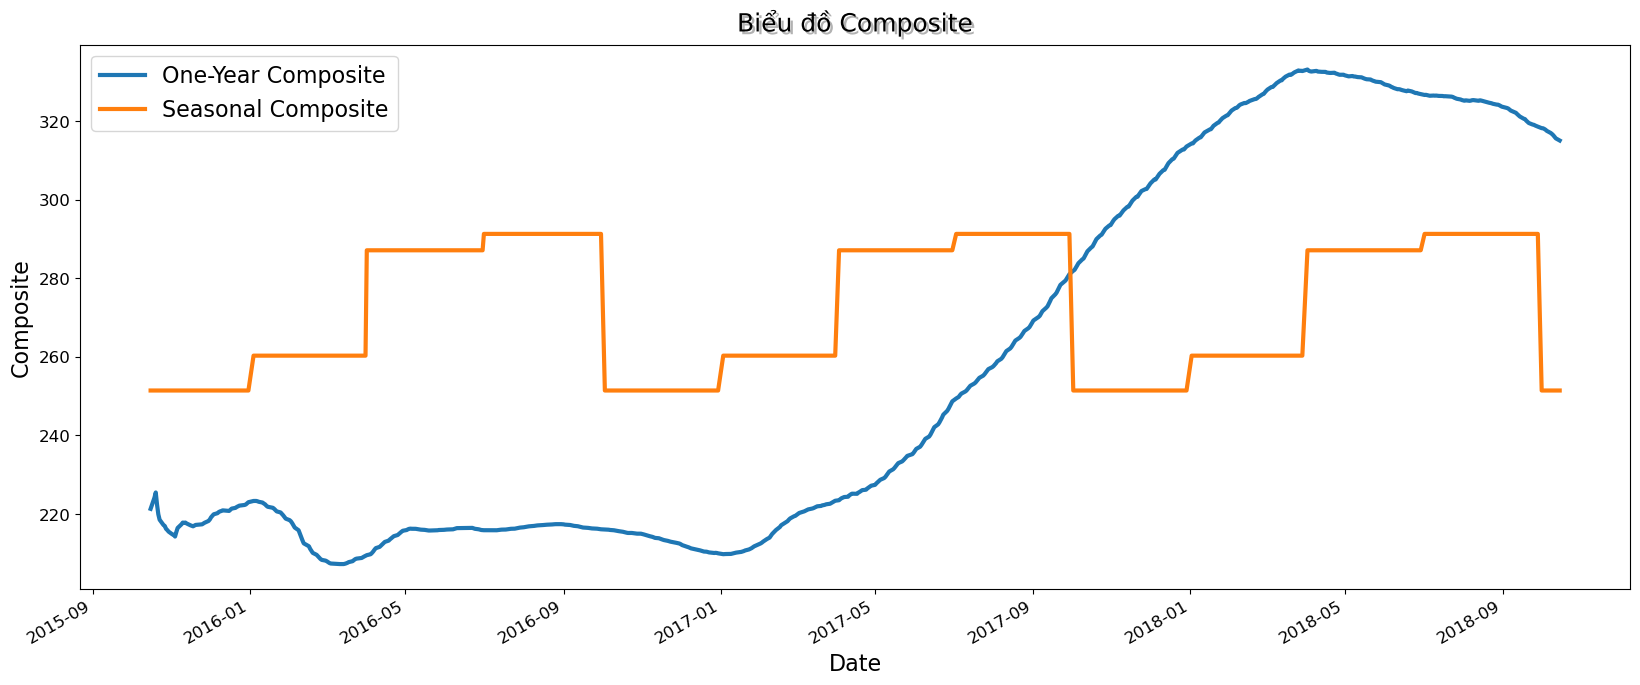

In [20]:
df['date'] = pd.to_datetime(df['date'])
composite_data = pd.DataFrame({'date': df['date'], 'One-Year Composite': df['One-Year Composite'], 'Seasonal Composite': df['Seasonal Composite']})
plotTimeSeries(composite_data.set_index('date'), title='Biểu đồ Composite', xlabel='Date', ylabel='Composite')
